# TECHNICAL WALKTHROUGH 
[GENERATOR](#GENERATOR)

<a id='HEAD'>''</a>

## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [4]:
import datetime
import os
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import clear_output
import time
import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy




f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# TOPIC, SCANTYPE & PARAMETERS SELECTION
<a id='PARAMS'></a>

1. Select which topic you wish to scan for (You can use # or most special characters). 
2. Scantype means you can chose between pulling in tweets as they happen or pull down historical tweets so you can view things like number of retweets (as if it is realtime, there wont have been time for retweet)

[JUMP TO TWEET SECTION](#TWEET)  
[JUMP TO BIO](#BIO)


In [5]:
TOPIC = 'Immigration'

# Realtime = 1 Historical = 2
scantype = 2
image = 'https://i.dailymail.co.uk/i/pix/2017/05/20/00/035B04BB000003E8-0-image-a-6_1495235383029.jpg'

# UPDATE THE TWEET TERMS YOU ARE INTERESTED IN 
TWEET_WORDONE='SAMPLE'
TWEET_WORDTWO='SAMPLE'
TWEET_WORDTHREE='SAMPLE'
TWEET_WORDFOUR = 'SAMPLE'
TWEET_WORDFIVE = 'SAMPLE'
TWEET_WORDSIX = 'SAMPLE'
TWEET_WORDSEVEN = 'SAMPLE'
TWEET_WORDEIGHT = 'SAMPLE'
TWEET_WORDNINE = 'SAMPLE'
TWEET_WORDTEN = 'SAMPLE'


# EXCLUDE WORDS FROM ANALYSIS
tweet_delete_a = 'SAMPLE'
tweet_delete_b = 'SAMPLE'
tweet_delete_c = "SAMPLE"
tweet_delete_d = 'SAMPLE'
tweet_delete_e = 'SAMPLE'


# UPDATE WITH WORDS YOU WANT TO INTERROGATE

BIO_WORDONE='SAMPLE'
BIO_WORDTWO='SAMPLE'
BIO_WORDTHREE='SAMPLE'
BIO_WORDFOUR = 'SAMPLE'
BIO_WORDFIVE = 'SAMPLE'
BIO_WORDSIX = 'SAMPLE'
BIO_WORDSEVEN = 'SAMPLE'
BIO_WORDEIGHT = 'SAMPLE'
BIO_WORDNINE = 'SAMPLE'
BIO_WORDTEN = 'SAMPLE'


# SCAN A TWEET FOR A GIVEN BIO¶
CHOSEN_BIO_WORD = 'proud'
# SCAN BIO FOR GIVEN TWEET
CHOSEN_TWEET_WORD = 'hate'

# LINK BIO AND TWEET
CHOSEN_TWEET_WORD_ONE = 'hate'
BIO_CHOSEN_WORD_ONE = 'love'


# REALTIME TWEETS

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 


*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [6]:
if scantype != 1:
    raise


# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []

progress = 0
max_count = 10000

f = IntProgress(description='Processing:',min=0, max=max_count,) # instantiate the bar
display(f) # display the bar




class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        progress = (f.value/max_count) * 100
        progress = format(progress, '.2f')
        print('Progress: ' + str(progress) + " %")
        clear_output(wait=True)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

#print('Pulling down data.....')
stream.filter(track=[TOPIC],languages=["en"])




RuntimeError: No active exception to reraise

# HISTORICAL TWEETS

In [7]:
# HISTORICAL DATA SWITCHED OFF (IF YOU SWITCH ON, THEN SWITCH STREAM OFF ABOVE)

if scantype != 2:
    raise


# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)









status_array = []
LOOP_COUNT = 0
max_count = 10000


# ------ENTER YOUR SERACH TERM HER E--------
tweets = tweepy.Cursor(api.search, q=TOPIC, count=int(max_count))

# TRACK PROGRESS
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar
progress = 0

print('Pulling down data.....')                    
for tweet in tweets.items(int(max_count)):
    f.value+=1 # signal to increment the progress bar
    progress = (f.value/max_count) * 100
    progress = format(progress, '.2f')
    print('Progress: ' + str(progress) + " %")
    clear_output(wait=True)
    time.sleep(.1)
    status_array.append(tweet._json)



print('Processing complete')



Processing complete


# QUICK PEEK

In [15]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
#print('An example element looks like: ')
#print(status_array[0])

Number of records
3262

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])



# REPORT GENERATION

**REMOVE** quotes to switch on reporting, you may need to create the folders listed below i.e. data folder description folder etc.

In [16]:
# REMOVE QUOTES TO ACTIVATE 
# append to filename
"""
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()


# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])
"""


'\ncurrentDT = datetime.datetime.now()\nfilename = "data/streamout-" + str(currentDT) + ".txt"\n\nprint(filename)\n\nwith open(filename, \'w\') as f:\n    for item in status_array:\n        f.write("%s\n" % item)\nf.close()\n\n\n# WRITE OUT FULL REPORT\nreportfile = "reports/printout-"+ str(currentDT) + ".txt"\ndescriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"\ntweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"\n\nREPORTCOUNT = 0\nwith open(reportfile, \'w\') as f:\n    for y in range(0, len(status_array)):\n        REPORTCOUNT = REPORTCOUNT + 1\n        f.write(\'************************************************************\n\')\n        f.write(status_array[y][\'text\'])\n        f.write(\'------------------------------\n\')\n        f.write(status_array[y][\'created_at\'])\n        f.write(\'------------------------------\n\')\n        f.write(status_array[y][\'user\'][\'name\'])\n        f.write(\'------------------------------\n\')\n        f.write(st

## TWEET NUMERICAL ANALYSIS

[JUMP TO HEAD](#HEAD)  
[JUMP TO PARAMS](#PARAMS)

Change the below values to see how they rank in tweet frequency,  **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.


In [48]:
WORDONE= TWEET_WORDONE.upper()
WORDTWO= TWEET_WORDTWO.upper()
WORDTHREE= TWEET_WORDTHREE.upper()
WORDFOUR = TWEET_WORDFOUR.upper()
WORDFIVE = TWEET_WORDFIVE.upper()
WORDSIX = TWEET_WORDSIX.upper()
WORDSEVEN = TWEET_WORDSEVEN.upper()
WORDEIGHT = TWEET_WORDEIGHT.upper()
WORDNINE = TWEET_WORDNINE.upper()
WORDTEN = TWEET_WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0




linecount = 0
APPENDED_TEXT = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = str(status_array[x]['text']).upper()
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(text).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(text).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(text).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(text).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(text).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(text).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(text).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(text).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(text).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
 


WORDONE_COUNT_PERCENT = round(((WORDONE_COUNT/len(status_array))*100),2)
WORDTWO_COUNT_PERCENT  = round(((WORDONE_COUNT/len(status_array))*100),2)
WORDTHREE_COUNT_PERCENT  = round(((WORDTHREE_COUNT/len(status_array))*100),2)
WORDFOUR_COUNT_PERCENT  = round(((WORDFOUR_COUNT/len(status_array))*100),2)
WORDFIVE_COUNT_PERCENT  = round(((WORDFIVE_COUNT/len(status_array))*100),2)
WORDSIX_COUNT_PERCENT  = round(((WORDSIX_COUNT/len(status_array))*100),2)
WORDSEVEN_COUNT_PERCENT  = round(((WORDSEVEN_COUNT/len(status_array))*100),2)
WORDEIGHT_COUNT_PERCENT  = round(((WORDEIGHT_COUNT/len(status_array))*100),2)
WORDNINE_COUNT_PERCENT  = round(((WORDNINE_COUNT/len(status_array))*100),2)
WORDTEN_COUNT_PERCENT  = round(((WORDTEN_COUNT/len(status_array))*100),2)
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT) + "               " + str(WORDONE_COUNT_PERCENT) + "%")
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT) + "              " + str(WORDTWO_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT) + "           " + str(WORDTHREE_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT) + "             " + str(WORDFOUR_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT) + "             " + str(WORDFIVE_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT) + "               " + str(WORDSIX_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT) + "            " + str(WORDSEVEN_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT) + "           " + str(WORDEIGHT_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT) + "             " + str(WORDNINE_COUNT_PERCENT)+ "%")
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT) + "               " + str(WORDTEN_COUNT_PERCENT)+ "%")
print('Total Number of Records: ' + str(linecount)) 


APPENDED_TEXT = APPENDED_TEXT.replace('#', '')
APPENDED_TEXT = APPENDED_TEXT.replace('.', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')



print('')

print("Length of appended text array : " + str(len(APPENDED_TEXT)))

print('')
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['TODAY'],x['GET'],x['WHEN'],x['COMMENT'],x['HER'],x['SHE'],x['FURTHER']
del x['HE'],x['HIS'],x['OUT'],x['HOW'],x['BECAUSE'],x['HIM'],x['WHY'],x['THINK'],x["IT'S"],x['TAKE'],x['OVER'],x[''],x[''],
del x['END'], x['ALSO'],x['SINCE'],x['END'],x['THAT'],x['UP'],x['IT’S'],x['SEE'],x['KNOW'],x['SHOULD'],x['HAD'],x['SAYS'],x['SAID'],x['DID'],x['—'],x['EVERY']
del x['YOU'],x['J'],x['WERE'],x['THERE'],x['“YOU'],x['THOSE'],x['OFTEN'],x['RIGHT']



#SPECIAL DELETE 
del x[tweet_delete_a],x[tweet_delete_b],x[tweet_delete_c],x[tweet_delete_d],x[tweet_delete_e]

large_top_tweets = OrderedDict(x.most_common(50))
top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)




Total count of words - MEXICO :28               0.86%
Total count of words - TRUMP :2610              0.86%
Total count of words - TARIFFS :26           0.8%
Total count of words - ILLEGAL :4             0.12%
Total count of words - BORDER :3             0.09%
Total count of words - ASYLUM :0               0.0%
Total count of words - HUMANITY :0            0.0%
Total count of words - DEPORT :7           0.21%
Total count of words - TERM :8             0.25%
Total count of words - TERM :8               0.25%
Total Number of Records: 3262

Length of appended text array : 418802

OrderedDict([('PRESIDENT', 639), ('LONDON', 372), ('UK', 372), ('QUEEN', 362), ('MAYOR', 270), ('DE', 264), ('@ROYALFAMILY:', 255), ('KHAN', 245), ('US', 240), ('FIRST', 218), ('LADY', 188), ('VISIT', 183), ('SADIQ', 171), ('ROYAL', 166), ('VIEW', 158), ('DISPLAY', 154), ('COLLECTION', 154), ('ITEMS', 152), ('PRINCE', 149), ('ILLUSTRATING', 147)])


# TWEET VISUALIATION
<a id='TWEET'></a>
[JUMP TO HEAD](#HEAD)  
[JUMP TO PARAMS](#PARAMS)

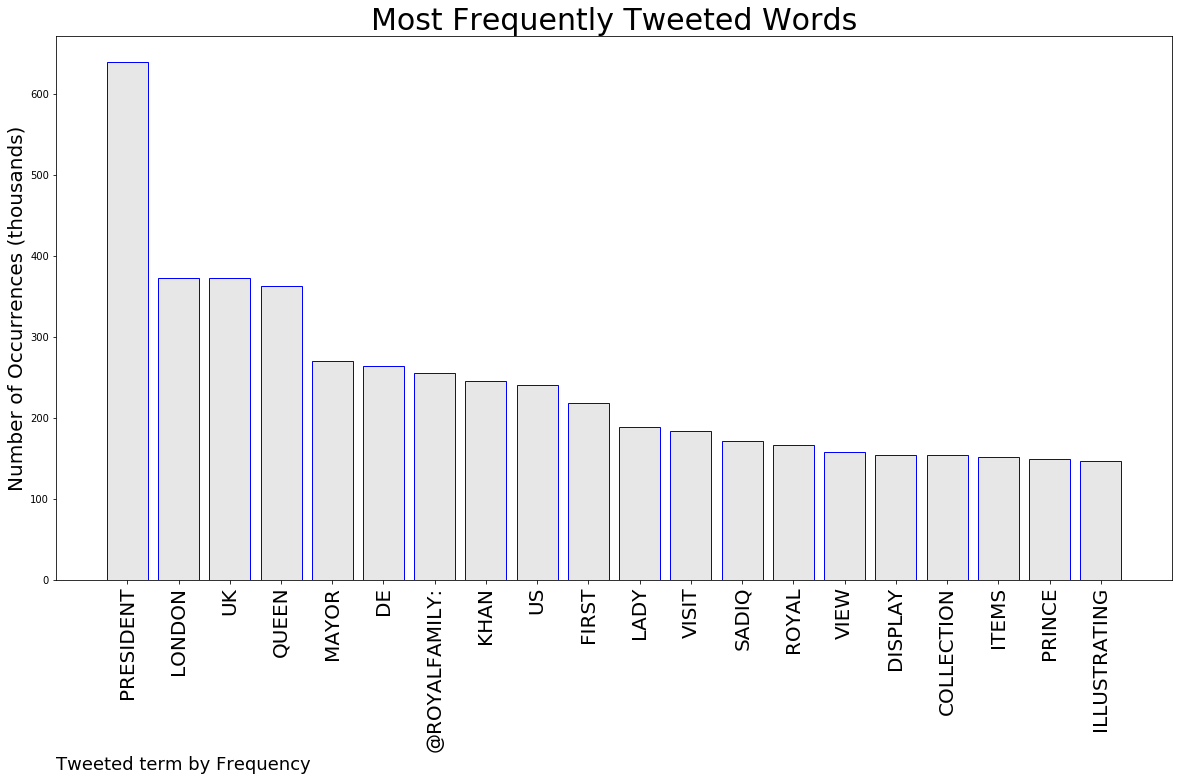

In [49]:
import os
import matplotlib.pyplot as plt

E = top_tweets
one = (0.1, 0.1, 0.1, 0.1)
two = (0.1, 0.1, 0.1, 0.1)
three = (0.1, 0.1, 0.1, 0.1)
four= (0.1, 0.1, 0.1, 0.1)
five= (0.1, 0.1, 0.1, 0.1)
six= (0.1, 0.1, 0.1, 0.1)
seven= (0.1, 0.1, 0.1, 0.1)
eight= (0.1, 0.1, 0.1, 0.1)
nine= (0.1, 0.1, 0.1, 0.1)
ten= (0.1, 0.1, 0.1, 0.1)
eleven= (0.1, 0.1, 0.1, 0.1)
twelve= (0.1, 0.1, 0.1, 0.1)
thirteen= (0.1, 0.1, 0.1, 0.1)
fourteen= (0.1, 0.1, 0.1, 0.1)
fithteen= (0.1, 0.1, 0.1, 0.1)
sixteen= (0.1, 0.1, 0.1, 0.1)
seventeen= (0.1, 0.1, 0.1, 0.1)
eighteen= (0.1, 0.1, 0.1, 0.1)
nineteen= (0.1, 0.1, 0.1, 0.1)
twenty= (0.1, 0.1, 0.1, 0.1)



color_last = [one, two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fithteen,sixteen,seventeen,eighteen,nineteen,twenty]
color = (0.1, 0.1, 0.1, 0.1)
plt.bar(range(len(E)), list(E.values()), align='center', color=color_last,  edgecolor='blue')

plt.xticks(range(len(E)), list(E.keys()), rotation='vertical', fontsize=20)
plt.title("Most Frequently Tweeted Words", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=20 )
plt.xlabel('Tweeted term by Frequency', horizontalalignment='left', position=(0,25),fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)

exists = os.path.isfile('TWEETS.png')
if exists:
    os.remove("TWEETS.png")

    
plt.savefig("TWEETS", bbox_inches="tight")
plt.show()


# TWEET COMPARISON

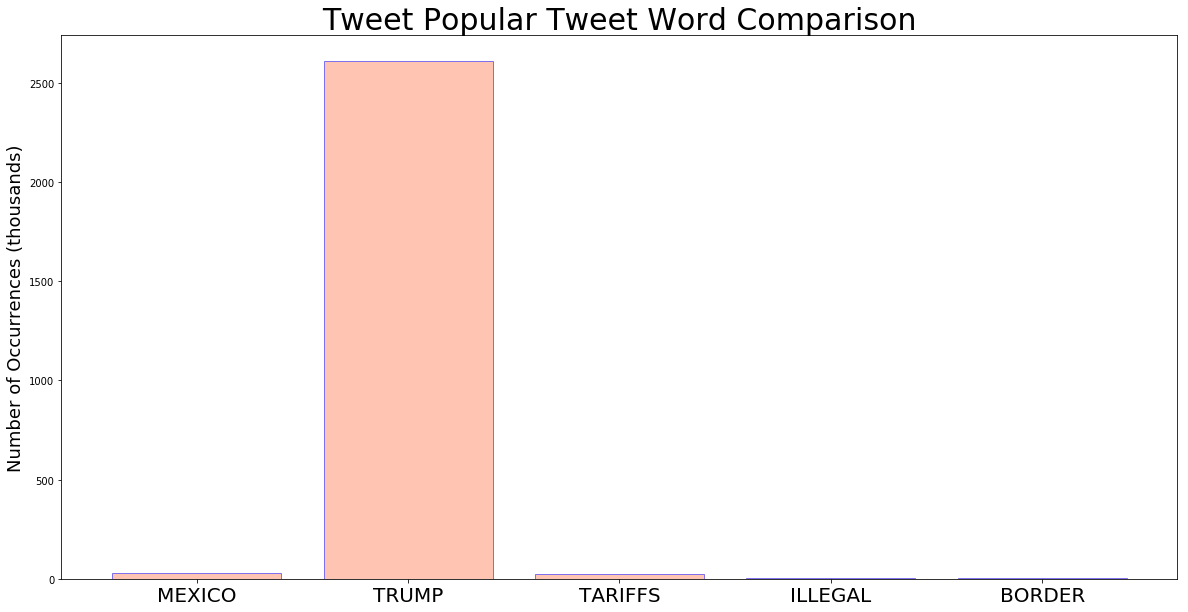

In [50]:
import matplotlib.pyplot as plt
B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal', fontsize=20)
plt.title("Tweet Popular Tweet Word Comparison", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")


exists = os.path.isfile('comparetweets.png')
if exists:
    os.remove("comparetweets.png")

    
plt.savefig("comparetweets")
plt.show()

## USER DESCRIPTION NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

In [22]:
WORDONE= BIO_WORDONE.upper()
WORDTWO= BIO_WORDTWO.upper()
WORDTHREE= BIO_WORDTHREE.upper()
WORDFOUR = BIO_WORDFOUR.upper()
WORDFIVE = BIO_WORDFIVE.upper()
WORDSIX = BIO_WORDSIX.upper()
WORDSEVEN = BIO_WORDSEVEN.upper()
WORDEIGHT = BIO_WORDEIGHT.upper()
WORDNINE = BIO_WORDNINE.upper()
WORDTEN = BIO_WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0


linecount = 0
APPENDED_DESCRIPTION = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = str(status_array[x]['user']['description']).upper()
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    
    
    if str(description).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(description).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(description).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(description).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(description).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(description).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(description).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(description).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(description).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(description).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
      
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT))
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT))
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT))
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT))
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT))
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT))
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT))
print('Total Number of Records: ' + str(linecount)) 


APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('#', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('.', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')




from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

large_bio_desc = OrderedDict(x.most_common(50))
top_bio_desc = OrderedDict(x.most_common(20))
print('')
print(top_bio_desc)


Total count of words - DEMOCRAT :82
Total count of words - CONSERVATIVE :114
Total count of words - REPUBLICAN :29
Total count of words - MEXICAN :6
Total count of words - AMERICAN :82
Total count of words - LIBERAL :70
Total count of words - TERM :5
Total count of words - TERM :5
Total count of words - TERM :5
Total count of words - TERM :5
Total Number of Records: 3262

OrderedDict([('LOVE', 149), ('TRUMP', 139), ('MAGA', 127), ('DE', 106), ('PROUD', 87), ('FAN', 84), ('LOVER', 81), ('LIFE', 75), ('WORLD', 74), ('CONSERVATIVE', 74), ('POLITICS', 70), ('MOM', 67), ('GOD', 64), ('RESIST', 63), ('NEWS', 63), ('AMERICAN', 62), ('PEOPLE', 62), ('US', 61), ('MUSIC', 60), ('Y', 60)])


# BIO VISUALIATION

<a id='BIO'></a>
[JUMP TO HEAD](#HEAD)  
[JUMP TO PARAMS](#PARAMS)

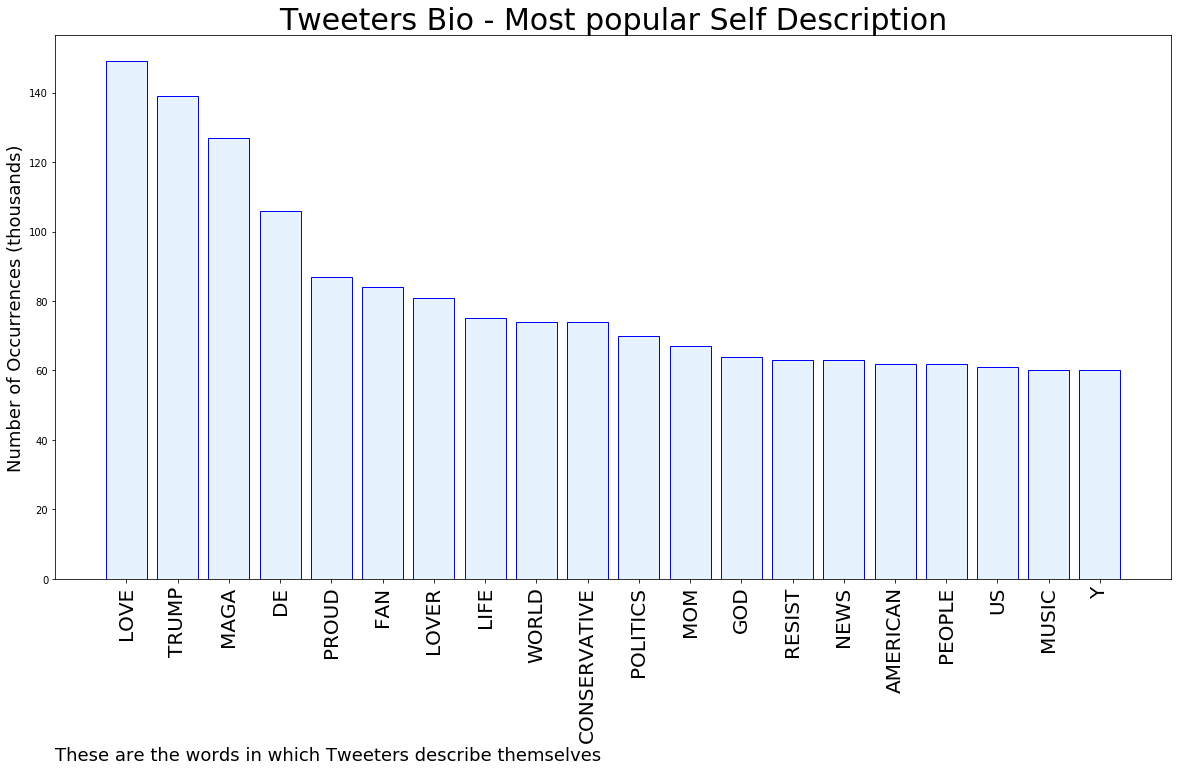

In [23]:
import matplotlib.pyplot as plt

D = top_bio_desc

plt.bar(range(len(D)), list(D.values()), align='center', color=(0.1, 0.5, 1, 0.1),  edgecolor='blue')

plt.xticks(range(len(D)), list(D.keys()), rotation='vertical', fontsize=20)
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)


exists = os.path.isfile('BIO.png')
if exists:
    os.remove("BIO.png")


plt.savefig("BIO", bbox_inches="tight")
plt.show()

## BIO TERM COMPARISON

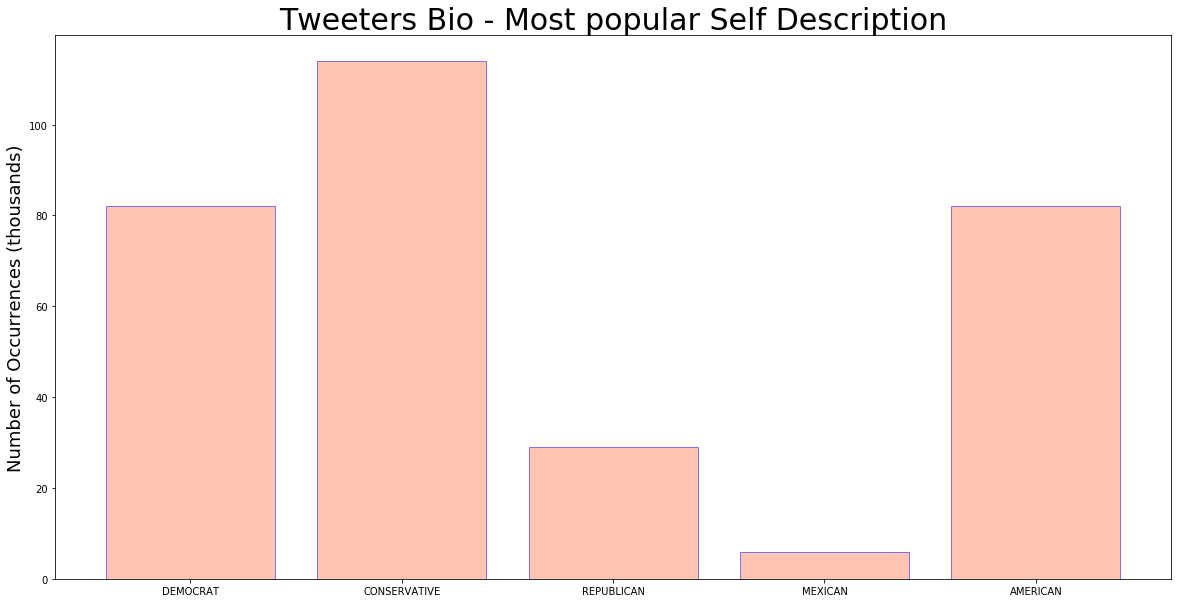

In [24]:
import matplotlib.pyplot as plt
B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal')
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")

exists = os.path.isfile('COMPARE.png')
if exists:
    os.remove("COMPARE.png")



plt.savefig("COMPARE")
plt.show()

# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [26]:
from textblob import TextBlob
import tweepy

VALUE = TOPIC

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [27]:
public_tweets = api.search(VALUE)

In [28]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')

    
sentiment_total = objective_tweet + subjective_tweet + negitively_subjective  

objective_tweet = round(((objective_tweet/sentiment_total) * 100),2)
subjective_tweet = round(((subjective_tweet/sentiment_total) * 100),2)
negitively_subjective = round(((negitively_subjective/sentiment_total) * 100),2)






print('objective_tweets : '+ str(objective_tweet) + " %")
print('subjective_tweets : '+ str(subjective_tweet) + " %")
print('negitively_subjective tweets: '+ str(negitively_subjective) + " %")
print("Total sentiments: " + str(sentiment_total))

RT @lopezobrador_: Agradezco la solidaridad de ricos y pobres, de la inmensa mayoría de los mexicanos en el tema de las tarifas que quiere…
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @LEBassett: The trolling in London is vicious as Trump arrives https://t.co/qJlFvYYDR4
Sentiment(polarity=-1.0, subjectivity=1.0)
Negatively subjective


@LisaRago1 @SassBaller Also animals. When Trump married his first wife she had a poodle. The dog couldn’t stand Trump.
Sentiment(polarity=0.25, subjectivity=0.29166666666666663)
Subjective


RT @RoyalFamily: The Queen, President Trump and the First Lady view a display of items from the Royal Collection illustrating the enduring…
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Subjective


RT @TalbertSwan: "Resist Trump. Resist Racism. Resist Cruelty. Resist Hate. Resist Sexism."

Protest banners were hung from London's Vauxha…
Sentiment(polarity=-0.8, subjectivity=0.9)
Negatively subjective


RT @funder: Trump should resign right n

# SAMPLE

In [29]:
status_array[100]['text']

'RT @lopezobrador_: Agradezco la solidaridad de ricos y pobres, de la inmensa mayoría de los mexicanos en el tema de las tarifas que quiere…'

# MOST REFERENCED PEOPLE

In [30]:
quote_count = 0
quoted_users = []

# USING FOLLOWING REDUCES TO ONLY IF QUOTED if status_array[current]['is_quote_status'] == True: 

for current in range(0, len(status_array)):
    """If quoted, then check mentions and append mention screen names to array"""
    
    if status_array[current]['entities']['user_mentions'] is not None:
        for y in range(0, len(status_array[current]['entities']['user_mentions'])):
            quoted_users.append(status_array[current]['entities']['user_mentions'][y]['screen_name'])

                
print("Number of times users were quoted :" + str(len(quoted_users)))
       
quoteCounter = Counter(quoted_users)
quoteCounted = OrderedDict(quoteCounter.most_common(5))


print("Most quoted users are : " + str(quoteCounted) + "\n")   
    
reference_items = list(quoteCounted.items())



Number of times users were quoted :3776
Most quoted users are : OrderedDict([('RoyalFamily', 271), ('realDonaldTrump', 162), ('SadiqKhan', 94), ('funder', 92), ('AOC', 83)])



# GOOGLE TRENDS 

In [31]:
"""
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

with open('multiTimeline.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
google =data[3:]

dates = []
values = []
for x in range(0, len(google)):
    dates.append(str(google[x][0]))
    values.append(google[x][1])
    



y_pos = np.arange(len(dates))


plt.scatter(dates, values)

plt.title('Google Trend Over time')
plt.ylabel('Popularity as % of Max')
plt.xticks(y_pos, dates, fontsize=10, rotation=30)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='Y', nbins=6)

plt.show()
"""

"\nimport csv\nimport matplotlib.pyplot as plt; plt.rcdefaults()\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nwith open('multiTimeline.csv', newline='') as csvfile:\n    data = list(csv.reader(csvfile))\ngoogle =data[3:]\n\ndates = []\nvalues = []\nfor x in range(0, len(google)):\n    dates.append(str(google[x][0]))\n    values.append(google[x][1])\n    \n\n\n\ny_pos = np.arange(len(dates))\n\n\nplt.scatter(dates, values)\n\nplt.title('Google Trend Over time')\nplt.ylabel('Popularity as % of Max')\nplt.xticks(y_pos, dates, fontsize=10, rotation=30)\nplt.locator_params(axis='x', nbins=6)\nplt.locator_params(axis='Y', nbins=6)\n\nplt.show()\n"

In [32]:
"""
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

with open('geoMap.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
google =data[3:]

places = []
values = []
for x in range(0, len(google)):
    places.append(str(google[x][0]))
    values.append(google[x][1])
    
places = places[0:5]
values = values[0:5]

# this is for plotting purpose
index = np.arange(len(places))
plt.barh(index, values)
plt.ylabel('District', fontsize=10)
plt.xlabel('Proportion Index', fontsize=10)
plt.yticks(index, places, fontsize=10, rotation=0)
plt.title('Interest by subregion')
plt.savefig("gcompare")
plt.show()

"""

'\nimport csv\nimport matplotlib.pyplot as plt; plt.rcdefaults()\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nwith open(\'geoMap.csv\', newline=\'\') as csvfile:\n    data = list(csv.reader(csvfile))\ngoogle =data[3:]\n\nplaces = []\nvalues = []\nfor x in range(0, len(google)):\n    places.append(str(google[x][0]))\n    values.append(google[x][1])\n    \nplaces = places[0:5]\nvalues = values[0:5]\n\n# this is for plotting purpose\nindex = np.arange(len(places))\nplt.barh(index, values)\nplt.ylabel(\'District\', fontsize=10)\nplt.xlabel(\'Proportion Index\', fontsize=10)\nplt.yticks(index, places, fontsize=10, rotation=0)\nplt.title(\'Interest by subregion\')\nplt.savefig("gcompare")\nplt.show()\n\n'

# SCAN A TWEET FOR A GIVEN BIO 

In [33]:
from collections import Counter, OrderedDict
CHOSEN_BIO_WORD = CHOSEN_BIO_WORD.upper()


TARGETARRAY = []
TARGETTWEET = ""
linecount = 0
for x in range(0, len(status_array)):
    text = str(status_array[x]['text']).upper()
    description = str(status_array[x]['user']['description']).upper()
   
    if str(description).count(str(CHOSEN_BIO_WORD)) >= 1:
        TARGETARRAY.append(status_array[x])
        TARGETTWEET = TARGETTWEET +  str(status_array[x]['text']).upper()



DISC = TARGETTWEET.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

refinedTWEETS = OrderedDict(x.most_common(50))
print("Number of matching tweets: " + str(len(TARGETARRAY)))
print("Top 50 terms in their tweets: " + str(refinedTWEETS))

Number of matching tweets: 4
Top 50 terms in their tweets: OrderedDict([('@ROYALFAMILY:', 3), ('QUEEN,', 3), ('PRESIDENT', 3), ('TRUMP', 3), ('FIRST', 2), ('LADY', 2), ('VIEW', 2), ('DISPLAY', 2), ('ITEMS', 2), ('ROYAL', 2), ('COLLECTION', 2), ('ILLUSTRATING', 2), ('ENDURING…RT', 2), ('RT', 1), ('MRS', 1), ('STAND', 1), ('PRINCE', 1), ('WALES', 1), ('DUCHESS', 1), ('CORNWALL', 1), ('US', 1), ('UK', 1), ('NATIONA…RT', 1), ('@FUNDER:', 1), ('LONDON’S', 1), ('MAYOR', 1), ('SADIQ', 1), ('KHAN', 1), ('SENT', 1), ('SCATHING', 1), ('NEW', 1), ('VIDEO', 1), ('MESSAGE', 1), ('TRUMP:', 1), ('“ONLY', 1), ('WEAK', 1), ('MEN', 1), ('FEAR', 1), ('STRONG', 1), ('WOMEN”', 1), ('#TRUMPSANINTERNATION…', 1)])


# SCAN BIO FOR GIVEN TWEET

In [34]:
from collections import Counter, OrderedDict


CHOSEN_TWEET_WORD = CHOSEN_TWEET_WORD.upper()


TARGETARRAY = []
TARGETBIO = ""
linecount = 0
for x in range(0, len(status_array)):
    text = str(status_array[x]['text']).upper()
    description = str(status_array[x]['user']['description']).upper()
   
    if str(text).count(str(CHOSEN_TWEET_WORD)) >= 1:
        TARGETARRAY.append(status_array[x])
        TARGETBIO = TARGETBIO + str(status_array[x]['user']['description']).upper()



DISC = TARGETBIO.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

refinedBio = OrderedDict(x.most_common(50))
print("Number of matching tweets: " + str(len(TARGETARRAY)))
print("Top 50 terms in their bio: " + str(refinedBio))

Number of matching tweets: 7
Top 50 terms in their bio: OrderedDict([('CONSERVATIVE', 3), ('VERY', 2), ('TRUSTEE,', 2), ('//', 2), ('WIFE,', 1), ('MUM,', 1), ('GRANDMOTHER.', 1), ('WASPI', 1), ('WOMAN.', 1), ('PRO', 1), ('BREXIT', 1), ('PARTY', 1), ('LESS.', 1), ('FEELING', 1), ('LET', 1), ('DOWN.', 1), ('POSITIVE', 1), ('ALLOWED', 1), ('LEAVE.TEACHER', 1), ('MATHEMATICS', 1), ('ENGLISH.', 1), ('CO-ORGANISER,', 1), ('@INSTOFIDEAS', 1), ('EDUCATION', 1), ('FORUM', 1), ('HTTPS://T.CO/X0CPWIDHJY;', 1), ('@BLAKE_SOCIETY;', 1), ('@YOUNG_JOURNOS.17', 1), ('MEMBER', 1), ("DEVIL'S", 1), ('ADVOCATEA', 1), ('BRAND', 1), ('NEW', 1), ('PROFILE.', 1), ('FRESH', 1), ('BEGINNING.', 1), ('HOPE', 1), ('REMEMBER', 1), ('ME.', 1), ('PRINCIPLE', 1), ('ALSO', 1), ('REPUBLICAN.', 1), ('FORMER', 1), ('@EF', 1), ('TEACHER.DOTING', 1), ('DAD.', 1), ('BELIEVER', 1), ('BREXIT.', 1), ('MAINSTREAM', 1), ('SUPPORTER', 1)])


# LINK BIO AND TWEET

In [35]:
print(large_top_tweets)
print("")
print("bio")
print(large_bio_desc)

OrderedDict([('TRUMP', 1950), ('PRESIDENT', 639), ('LONDON', 372), ('UK', 372), ('QUEEN', 362), ('DONALD', 277), ('MAYOR', 270), ('DE', 264), ('@ROYALFAMILY:', 255), ('KHAN', 245), ('US', 240), ('FIRST', 218), ('TRUMP’S', 212), ('LADY', 188), ('VISIT', 183), ('SADIQ', 171), ('ROYAL', 166), ('VIEW', 158), ('DISPLAY', 154), ('COLLECTION', 154), ('ITEMS', 152), ('PRINCE', 149), ("TRUMP'S", 148), ('ILLUSTRATING', 147), ('STAND', 136), ('@REALDONALDTRUMP', 132), ('WALES', 124), ('STATE', 120), ('DUCHESS', 119), ('CORNWALL', 118), ('MRS', 117), ('ENDURING…RT', 116), ('LA', 116), ('EL', 112), ('AGAINST', 110), ('RESIST', 102), ('MESSAGE', 101), ('SECRETARY', 99), ('TRYING', 95), ('SEEMS', 90), ('ELAINE', 90), ('NEWS', 89), ('IMPEACHMENT', 87), ('OBAMA', 87), ('TRUMP:', 87), ('@FUNDER:', 87), ('USE', 86), ('POSITION', 86), ('PROTEST', 86), ('NATIONA…RT', 86)])

bio
OrderedDict([('LOVE', 149), ('TRUMP', 139), ('MAGA', 127), ('DE', 106), ('PROUD', 87), ('FAN', 84), ('LOVER', 81), ('LIFE', 75), (

In [36]:
#PICK TWO OR 

CHOSEN_WORD_ONE = CHOSEN_TWEET_WORD_ONE.upper()
BIO_CHOSEN_WORD_ONE = BIO_CHOSEN_WORD_ONE.upper()




TARGETARRAY = []
linecount = 0
for x in range(0, len(status_array)):
    text = str(status_array[x]['text']).upper()
    description = str(status_array[x]['user']['description']).upper()
   
    if str(text).count(str(CHOSEN_WORD_ONE)) >= 1 and str(description).count(str(BIO_CHOSEN_WORD_ONE)) >= 1:
        TARGETARRAY.append(status_array[x])


match_percentage =  (len(TARGETARRAY)/len(status_array)) * 100
match_percentage = round(match_percentage,2)
print("No of matches : " + str(match_percentage) + "%" )    
print(TARGETARRAY[0]['text'])
print("")
print('Bio: ')
print(TARGETARRAY[0]['user']['description'])

No of matches : 3.49%
RT @ClarenceHouse: President Trump and the First Lady join The Prince of Wales and The Duchess of Cornwall for tea at Clarence House. 

#US…

Bio: 
Follower of Yahshua the Messiah. Sabbath Observer. #MAGA #KAG Conservative. Pro-life. #3Stars4GenFlynn. #Qanon #WWG1WGA #IStandWithGenFlynn


In [37]:
status_array[1]['user']['created_at']

'Fri Dec 07 13:45:24 +0000 2012'

# COUNT NEW USERS    

In [38]:
import time
from datetime import datetime, timedelta
present = datetime.now()

timerange = 10



newcount = 0

for x in range(0, len(status_array)):
    created_at = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(status_array[x]['user']['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
    then = datetime.strptime(created_at, "%Y-%m-%d %H:%M:%S")
    delta = datetime.now() - then
    if delta.days < timerange:
        newcount = newcount + 1
        #print(status_array[x]['user']['created_at'])
        #print(created_at)
        #print(delta)

        
percentnewcount = (newcount/len(status_array)) * 100
percentnewcount = round(percentnewcount,2)



print("No of Profiles newer than " + str(timerange) + " days are : " + str(percentnewcount) + "%")


No of Profiles newer than 10 days are : 0.64%


# COUNT FOLLOWERS

In [39]:
count = 0 
maxcount = 0
followercount = 10
maxfollowercount = 1000000

for x in range(0, len(status_array)):
    if status_array[x]['user']['followers_count'] < followercount:
        count = count + 1 
        
    if status_array[x]['user']['followers_count'] > maxfollowercount:
        maxcount = maxcount + 1 
    
percentcount = (count / len(status_array)) * 100
percentcount = round(percentcount,2)


maxpercentcount = (maxcount / len(status_array)) * 100
maxpercentcount = round(maxpercentcount,2)

print("No of people with less than " + str(followercount) + " followers :" + str(percentcount) + "%")
print("No of people with more than " + str(maxfollowercount) + " followers :" + str(maxpercentcount) + "%")

No of people with less than 10 followers :3.68%
No of people with more than 1000000 followers :0.21%


# MOST RETWEETED

In [40]:
import operator

retweet_count = []

for x in range(0, len(status_array)):
    retweet_count.append(status_array[x]['retweet_count'])

# Requires operator lib    
index, value = max(enumerate(retweet_count), key=operator.itemgetter(1))

if status_array[index]['retweet_count'] != value:
    print('something went wrong')
    
most_retweeted = str(status_array[index]['text'])

print("The most retweeted user is: " + str(status_array[index]['user']['screen_name'])) 
print('Created on :' + str(status_array[index]['created_at']))
print("Their tweet was : " + str(most_retweeted))
print("No of retweets: " + str(value))

The most retweeted user is: cindycrum
Created on :Mon Jun 03 16:44:42 +0000 2019
Their tweet was : RT @mattmfm: How seriously does the rest of the world take Trump? Well, here’s how Sky News is advertising his UK state visit. Watch. https…
No of retweets: 56223


# REPORT GENERATOR
<a id='GENERATOR'>''</a>
[HEAD](#HEAD)



In [41]:

#PRINT FORMAT
print('# MURCHIE85 TWITTER PROCESSING ')
print('')
print('&#x1F34E; **TOPIC = "' + str(TOPIC) + '"**')
print('')
print('')
print('## AUTOMATED RESEARCH SUMMARY')
print('')
print('')
print('![image](' + str(image) + ')')
print('')
print('<br></br>')
print('')
print('<div class="alert alert-block alert-danger"><b> This repo is for pulling metrics on a given keyword or hashtag and performs a series of reporting and analysis.</b></div>')
print('')
print('')
print('')
print('') 
print('![image](TWEETS.png)')
print('')
print('')
print('')
print('')
print('|                ** Sample-Tweets  **        |')
print('| :-------------: |')
print('| <div class="alert alert-block alert-warning">' + str(status_array[10]['text']) + '</div><div class="alert alert-block alert-success">' + str(status_array[100]['text']) + '</div><div class="alert alert-block alert-info">' + str(status_array[70]['text']) + '</div> |')
print('')
print('')
print('## GOOGLE SEARCH DEMOGRAPHICS ')
print('')
print('Tweeting demographic           | Countries')
print(':-------------------------:|:-------------------------:')
print('![](maps.png)  |  ![](gcompare.png)')
print('<br>')
print('')
print('## RELATED TOPICS  & QUERIES ')
print('')
print('topics          | searches')
print(':-------------------------:|:-------------------------:')
print('![](topic.png)  |  ![](query.png)')
print('')
print('<br>')
print('<br>')
print('')
print('')
print('## RELATED METRICS')
print('<br>')
print('')
print('| Metric | Value |')
print('| ------------- | ------------- |')
print('| #1 Most tweeted to  | **' + str(reference_items[0][0]) + '** |')
print('| #2 Most tweeted to  | **' + str(reference_items[1][0]) + '** |')
print('| #3 Most tweeted to  | **' + str(reference_items[2][0]) + '** |')
print('| NewProfiles (less than 10 days) | ' + str(str(percentnewcount)) + '%  |')
print('| Tweeters with < ' + str(followercount) + ' followers  | ' + str(percentcount) + '%|')
print('| Tweeters with > ' + str(maxfollowercount) + ' followers  | '  + str(maxpercentcount) + '%  |')
print('')
print('')
print('<br>')
print('')
print('## MOST POPULAR TWEET TERMS ')
print('<br>')
print('')
print('| Popularity Rank  | Term |')
print('| ------------- | ------------- |')
print('| first  | **' + str(str(list(top_tweets)[0:1])).replace('[','').replace(']','').replace("'",'') + '**  |')
print('| second  | **' + str(str(list(top_tweets)[1:2])).replace('[','').replace(']','').replace("'",'') + '**  |')
print('| third  | **' + str(str(list(top_tweets)[2:3])).replace('[','').replace(']','').replace("'",'') + '** |')
print('| fourth  | **' + str(str(list(top_tweets)[3:4])).replace('[','').replace(']','').replace("'",'') + '**  |')
print('| fifth  | **' + str(str(list(top_tweets)[4:5])).replace('[','').replace(']','').replace("'",'') + '**  |')
print('')
print('')
print('<br>')
print('')
print('![image](comparetweets.png)')
print('')
print('## Twitter Bio Analysis')
print('![image](BIO.png)')
print('')
print('### SENTIMENT ANALYSIS')
print('')
print('')
print('VIEWS WERE : **SUBJECTIVE**  (' + str(subjective_tweet) + '%) & **NEGATIVELY-SUBJECTIVE** (' + str(negitively_subjective) + '%) **OBJECTIVE** (' + str(objective_tweet) +'%)')
print('')
print('### TWEET SAMPLE ')
print('')
print('Random value picked from array: ')
print('')
print('<div class="alert alert-block alert-info">' + str(status_array[100]['text']) + '</div>')
print('')
print('### MOST RETWEETED')
print('')
print('<div class="alert alert-block alert-danger"> ' + str(most_retweeted) + '</div>')
print('')
print('### CONCLUSION & EXTERNAL ANALYSIS')
print('')
print('*This is my [Adam McMurchie`s] opinion on the data from the tweets, it serves as no objective truth.Since the tweets themselves are a mixture of fact & opinion.')
print('<br>')
print('')
print('Authors analytical summary on request.')
print('')
print('**RECOMMENDATIONS** WILL BE UPDATED IN NEXT  24 HOURS ')
print('<br>')




# MURCHIE85 TWITTER PROCESSING 

&#x1F34E; **TOPIC = "Trump"**


## AUTOMATED RESEARCH SUMMARY


![image](https://ichef.bbci.co.uk/news/660/cpsprodpb/0D2B/production/_102517330_ac93680d-df35-4664-bbfe-7ff26a698888.jpg)

<br></br>

<div class="alert alert-block alert-danger"><b> This repo is for pulling metrics on a given keyword or hashtag and performs a series of reporting and analysis.</b></div>




![image](TWEETS.png)




|                ** Sample-Tweets  **        |
| :-------------: |
| <div class="alert alert-block alert-warning">RT @ELLEUK: Mayor of London, @SadiqKhan has a message for @realDonaldTrump on his arrival to London about how women ought to be treated glo…</div><div class="alert alert-block alert-success">RT @lopezobrador_: Agradezco la solidaridad de ricos y pobres, de la inmensa mayoría de los mexicanos en el tema de las tarifas que quiere…</div><div class="alert alert-block alert-info">RT @florentderue: La vidéo de Sky News qui annonce la visite de Donald Trump e